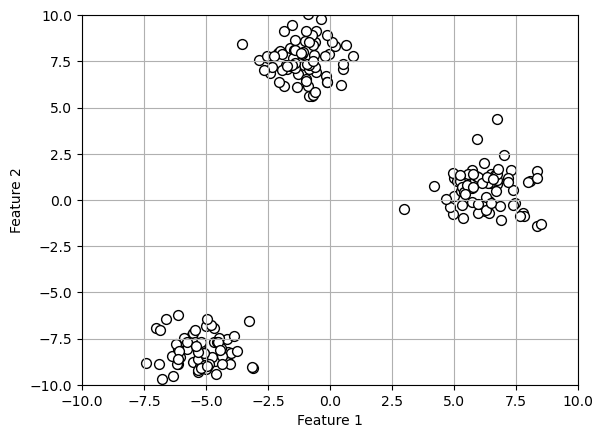

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=210, centers=3, n_features=2, cluster_std=1.0, shuffle=True, random_state=42)
X -= X.mean(axis=0)
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='k', s=50)
plt.grid()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.show()

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init = 'random', n_init=10, max_iter=300, tol = 1e-4, random_state=42)

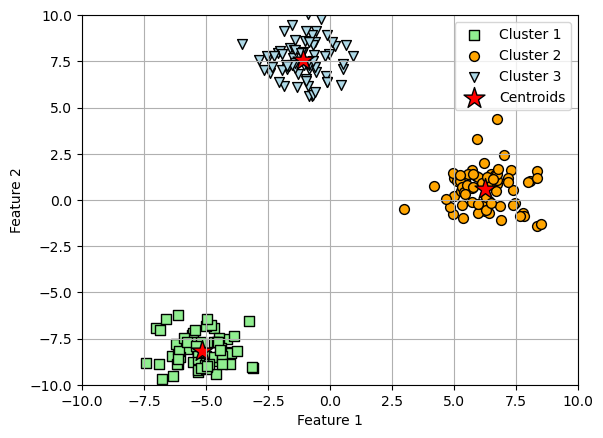

In [5]:
y_km = kmeans.fit_predict(X)
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='k', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='k', label='Cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='k', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='k', label='Centroids')
plt.grid()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.show()

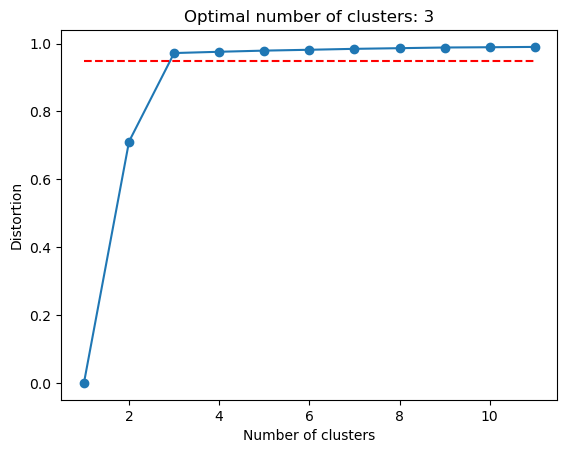

In [6]:
import numpy as np
distortions = []
n_center_max = 11
for i in np.arange(n_center_max):
    kmeans = KMeans(n_clusters=i+1, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
distortions /= np.max(distortions)
distortions = 1 - distortions
plt.plot(np.arange(n_center_max)+1, distortions, marker='o')
plt.plot([1, n_center_max], 0.95 * np.ones(2), linestyle='--', color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')


optimal_n_clusters = sum(np.array(distortions) < 0.95) + 1
plt.title(f'Optimal number of clusters: {optimal_n_clusters}')
plt.show()

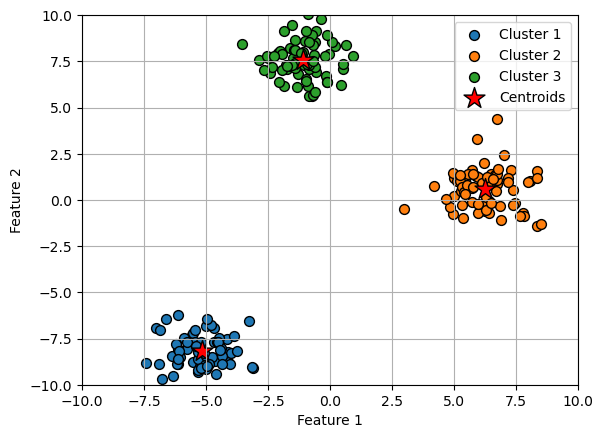

In [7]:
km = KMeans(n_clusters=optimal_n_clusters, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=42)
y_km = km.fit_predict(X)
for i in range(optimal_n_clusters):
    plt.scatter(X[y_km == i, 0], X[y_km == i, 1], s=50, edgecolor='k', label=f'Cluster {i+1}')


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='k', label='Centroids')
plt.grid()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.show()


In [8]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X=X, labels=y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0


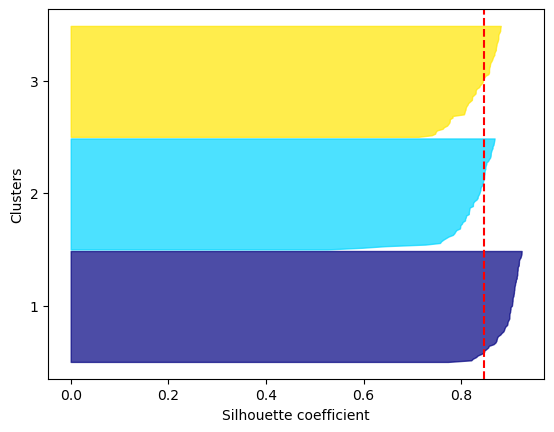

In [9]:
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_lower = i * X.shape[0] / n_clusters
    y_upper = (i + 1) * X.shape[0] / n_clusters
    color = cm.jet(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, c_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    yticks.append((y_upper + y_lower) / 2)
    

plt.xlabel('Silhouette coefficient')
plt.ylabel('Clusters')
plt.yticks(yticks, cluster_labels + 1)
plt.axvline(x=silhouette_score(X, y_km, metric='euclidean'), color='red', linestyle='--')
plt.show()

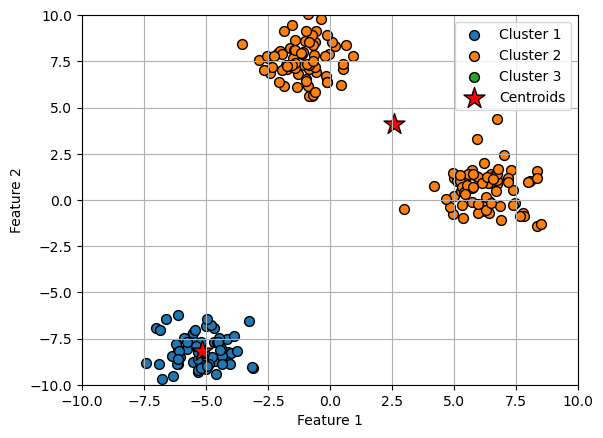

2
0 70
70 210


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


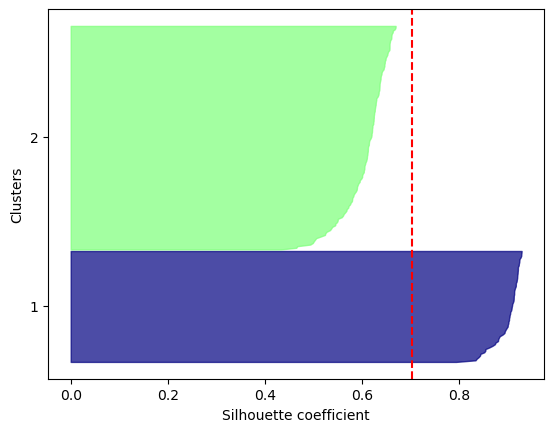

In [10]:
km = KMeans(n_clusters=optimal_n_clusters-1, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=42)
y_km = km.fit_predict(X)
for i in range(optimal_n_clusters):
    plt.scatter(X[y_km == i, 0], X[y_km == i, 1], s=50, edgecolor='k', label=f'Cluster {i+1}')


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='k', label='Centroids')
plt.grid()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.show()

cluster_labels = np.unique(y_km)

n_clusters = cluster_labels.shape[0]
print(n_clusters)
silhouette_vals = silhouette_samples(X=X, labels=y_km, metric='euclidean')
y_lower, y_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    
    y_upper += len(c_silhouette_vals) 
    print(y_lower, y_upper)
    color = cm.jet(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, c_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    yticks.append((y_upper + y_lower) / 2)
    y_lower = y_upper
    

plt.xlabel('Silhouette coefficient')
plt.ylabel('Clusters')
plt.yticks(yticks, cluster_labels + 1)
plt.axvline(x=silhouette_score(X, y_km, metric='euclidean'), color='red', linestyle='--')
plt.show()


In [11]:
import numpy as np
import pandas as pd
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [12]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram
#row_clusters = linkage(df.values, method='complete', metric='euclidean')
row_clusters = linkage(pdist(df, metric = 'euclidean'), method='complete')

In [14]:
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'], index=[f'cluster {i+1}' for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


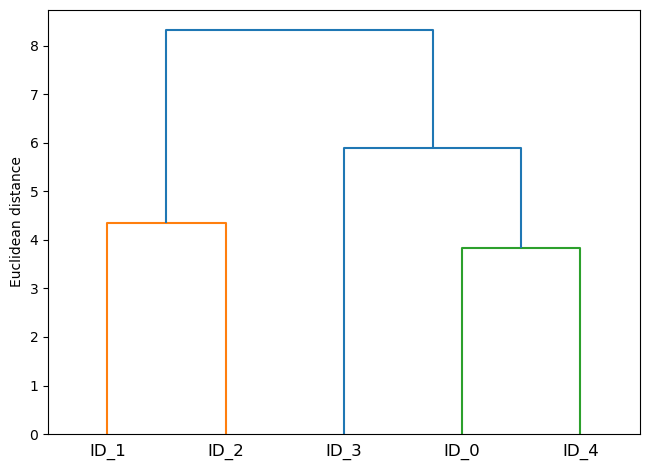

In [15]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, labels = labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

/var/folders/zv/b9smh25s5ssg7711mb72_g500000gn/T/ipykernel_1134/1865530708.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/var/folders/zv/b9smh25s5ssg7711mb72_g500000gn/T/ipykernel_1134/1865530708.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_yticklabels([''] + list(df_rowclust.index))


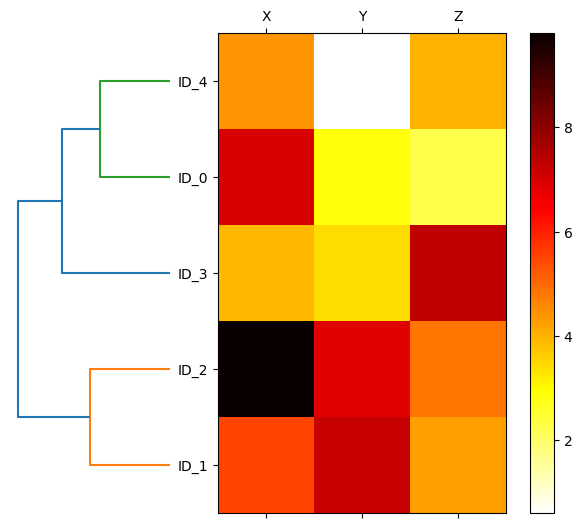

In [20]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation = 'left')
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, cmap = 'hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
fig.colorbar(cax)
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering
for ii in range(2, 4):
    ac = AgglomerativeClustering(n_clusters=ii, metric='euclidean', linkage='complete')
    labels = ac.fit_predict(X)
    print(f'Cluster labels with {ii} clusters: {labels}')

Cluster labels with 2 clusters: [0 1 1 0 0]
Cluster labels with 3 clusters: [1 0 0 2 1]


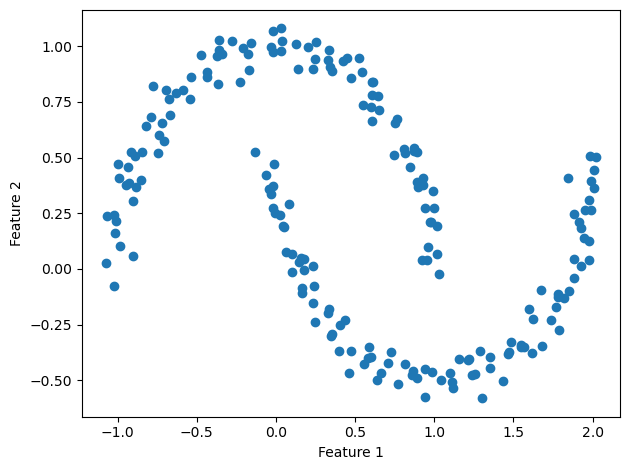

In [26]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()

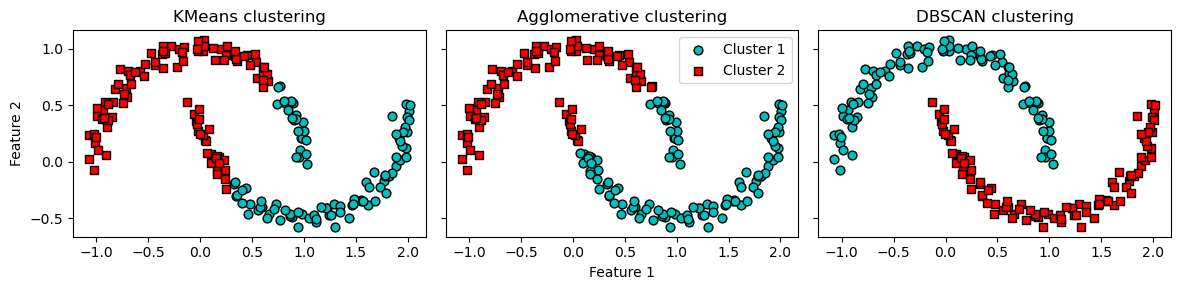

In [35]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 3))
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=40, c='c', marker='o', edgecolor='k', label='Cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=40, c='r', marker='s', edgecolor='k', label='Cluster 2')
ax1.set_title('KMeans clustering')
ax1.set_ylabel('Feature 2')
ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], s=40, c='c', marker='o', edgecolor='k', label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], s=40, c='r', marker='s', edgecolor='k', label='Cluster 2')
ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('Feature 1')
ax2.set_yticklabels([])
ax2.legend()
db = DBSCAN(eps = 0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
ax3.scatter(X[y_db == 0, 0], X[y_db == 0, 1], s=40, c='c', marker='o', edgecolor='k', label='Cluster 1')
ax3.scatter(X[y_db == 1, 0], X[y_db == 1, 1], s=40, c='r', marker='s', edgecolor='k', label='Cluster 2')
ax3.set_title('DBSCAN clustering')
ax3.set_yticklabels([])

plt.tight_layout()